# Data Cleaning

- Load in The Numbers dataset and clean to determine which movies we have good profitability data on
- Load in the IMDB sql dataset and append useful features to our list of films that we can use for our analysis

### Imports

In [2]:
import pandas as pd
import sqlite3
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

### The Numbers Dataset

explain here why we are using this dataset over the others

In [2]:
tn_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

Let's clean it up

In [3]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [4]:
tn_budgets['release_year'] = tn_budgets['release_date'].dt.year

In [5]:
tn_budgets.release_year[tn_budgets['release_year'] > 2000].value_counts()

2015    338
2010    274
2008    264
2006    260
2014    255
2011    254
2009    239
2013    238
2012    235
2005    223
2007    220
2016    219
2002    210
2004    206
2003    201
2001    181
2017    168
2018    143
2019     67
2020      3
Name: release_year, dtype: int64

Explain why we filter out pre-2000

In [6]:
tn_clean = tn_budgets[tn_budgets['release_year'] >= 2000]

We need to change the datatypes of the profit features

In [7]:
# Using lambda to convert the strings to floats after stripping the dollar signs and commas.

tn_clean['production_budget'] = tn_clean['production_budget'].apply(
    lambda x: float(x.replace('$', '').replace(',', '')));

tn_clean['domestic_gross'] = tn_clean['domestic_gross'].apply(
    lambda x: float(x.replace('$', '').replace(',', '')));

tn_clean['worldwide_gross'] = tn_clean['worldwide_gross'].apply(
    lambda x: float(x.replace('$', '').replace(',', '')));

<ipython-input-7-c706bd37e68d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_clean['production_budget'] = tn_clean['production_budget'].apply(
<ipython-input-7-c706bd37e68d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_clean['domestic_gross'] = tn_clean['domestic_gross'].apply(
<ipython-input-7-c706bd37e68d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [8]:
tn_clean['gross_profit_ww'] = tn_clean['worldwide_gross'] - tn_clean['production_budget']

<ipython-input-8-c7095d70e9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_clean['gross_profit_ww'] = tn_clean['worldwide_gross'] - tn_clean['production_budget']


In [9]:
tn_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_profit_ww
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2009,2351345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,2011,635063875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,2019,-200237650.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,2015,1072413963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,2017,999721747.00
...,...,...,...,...,...,...,...,...
5776,77,2004-12-31,The Mongol King,7000.00,900.00,900.00,2004,-6100.00
5777,78,2018-12-31,Red 11,7000.00,0.00,0.00,2018,-7000.00
5779,80,2005-07-13,Return to the Land of Wonders,5000.00,1338.00,1338.00,2005,-3662.00
5780,81,2015-09-29,A Plague So Pleasant,1400.00,0.00,0.00,2015,-1400.00


In [10]:
tn_clean['gross_ROI'] = (tn_clean['gross_profit_ww'] / tn_clean['production_budget'])

<ipython-input-10-91392c8e32d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_clean['gross_ROI'] = (tn_clean['gross_profit_ww'] / tn_clean['production_budget'])


In [11]:
tn_clean.sort_values('gross_profit_ww', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_profit_ww,gross_ROI
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2009,2351345279.00,5.53
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,2018,1748134200.00,5.83
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,2015,1747311220.00,5.71
33,34,2015-06-12,Jurassic World,215000000.00,652270625.00,1648854864.00,2015,1433854864.00,6.67
66,67,2015-04-03,Furious 7,190000000.00,353007020.00,1518722794.00,2015,1328722794.00,6.99
26,27,2012-05-04,The Avengers,225000000.00,623279547.00,1517935897.00,2012,1292935897.00,5.75
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.00,381193157.00,1341693157.00,2011,1216693157.00,9.73
41,42,2018-02-16,Black Panther,200000000.00,700059566.00,1348258224.00,2018,1148258224.00,5.74
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.00,417719760.00,1305772799.00,2018,1135772799.00,6.68
155,56,2013-11-22,Frozen,150000000.00,400738009.00,1272469910.00,2013,1122469910.00,7.48


In [12]:
tn_clean.sort_values('gross_ROI', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_profit_ww,gross_ROI
5492,93,2009-09-25,Paranormal Activity,450000.00,107918810.00,194183034.00,2009,193733034.00,430.52
5679,80,2015-07-10,The Gallows,100000.00,22764410.00,41656474.00,2015,41556474.00,415.56
5709,10,2004-05-07,Super Size Me,65000.00,11529368.00,22233808.00,2004,22168808.00,341.06
5781,82,2005-08-05,My Date With Drew,1100.00,181041.00,181041.00,2005,179941.00,163.58
5656,57,2007-05-16,Once,150000.00,9445857.00,23323631.00,2007,23173631.00,154.49
5774,75,2004-10-08,Primer,7000.00,424760.00,841926.00,2004,834926.00,119.28
5507,8,2004-06-11,Napoleon Dynamite,400000.00,44540956.00,46122713.00,2004,45722713.00,114.31
5430,31,2004-08-06,Open Water,500000.00,30500882.00,55518641.00,2004,55018641.00,110.04
5680,81,2006-09-29,Facing the Giants,100000.00,10178331.00,10243159.00,2006,10143159.00,101.43
5211,12,2012-01-06,The Devil Inside,1000000.00,53262945.00,101759490.00,2012,100759490.00,100.76


These are the movies we want to analyze. Now let's try and pull in our sql data

### IMDB Dataset

In [15]:
import os
import zipfile

# Check if 'im.db' exists, unzip if it doesn't
if not os.path.exists('../zippedData/im.db'):
    with zipfile.ZipFile('../zippedData/im.db.zip', 'r') as zip_ref:
        zip_ref.extractall('../zippedData')

# Connect to the SQLite database
conn = sqlite3.connect('../zippedData/im.db')

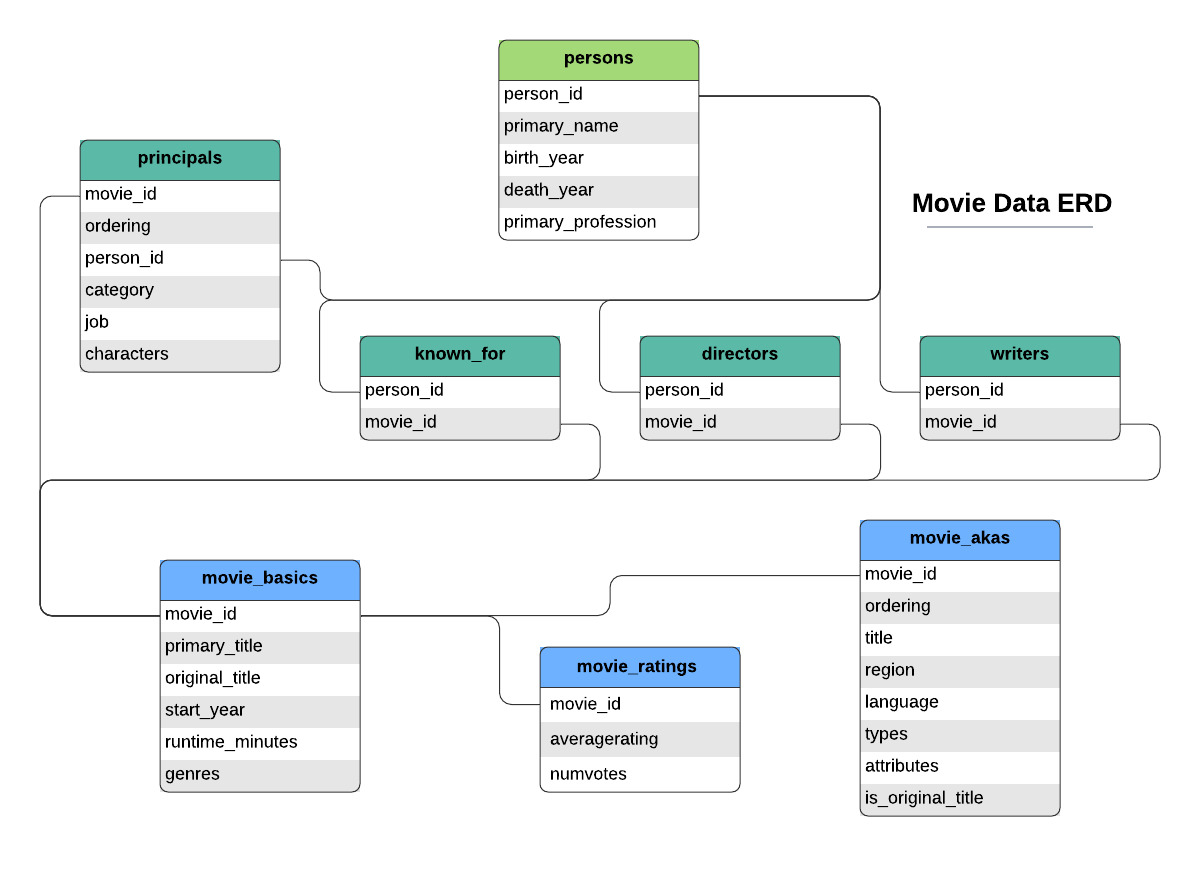

In [14]:
# We want primary_name, death_year, primary_profession
persons = pd.read_sql("""
  SELECT *
  FROM persons 
  """, conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,nan,nan,actress
606644,nm9990690,Joo Yeon So,nan,nan,actress
606645,nm9991320,Madeline Smith,nan,nan,actress
606646,nm9991786,Michelle Modigliani,nan,nan,producer


In [15]:
# From here, we want all features except job and characters

principals = pd.read_sql("""
  SELECT *
  FROM principals 
  """, conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [16]:
# We want all of the features here

ratings = pd.read_sql("""
  SELECT *
  FROM movie_ratings 
  """, conn)
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [17]:
# We want all of the features here

movies = pd.read_sql("""
  SELECT *
  FROM movie_basics  
  """, conn)
movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [16]:
imdb_df = pd.read_sql("""

SELECT 
    *
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
    JOIN principals AS pr
        USING(movie_id)
    JOIN persons AS ps
        USING(person_id)
  ;
  """, conn)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,1,nm0474801,actor,None,"[""Kundan S. Prasad"",""Bajrangi""]",Dilip Kumar,1922.00,nan,"actor,writer,director"
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,2,nm0904537,actress,None,"[""Munni"",""Laila-E-Aasmaan""]",Vyjayanthimala,1933.00,nan,"actress,music_department,miscellaneous"
2,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,3,nm0756379,actor,None,"[""Ganeshi N. Prasad""]",Balraj Sahni,1913.00,1973.00,"actor,writer,director"
3,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,4,nm0474876,actor,None,"[""Dwarka N. Prasad""]",Sanjeev Kumar,1938.00,1985.00,actor
4,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77,5,nm0712540,director,None,None,Harnam Singh Rawail,1921.00,2004.00,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Drømmeland,2019,72.00,Documentary,6.50,11,3,nm2768724,producer,producer,None,Wout Conijn,nan,nan,"producer,director,writer"
629594,tt9916160,Drømmeland,Drømmeland,2019,72.00,Documentary,6.50,11,4,nm4241788,composer,None,None,Tobias Borkert,nan,nan,"composer,music_department"
629595,tt9916160,Drømmeland,Drømmeland,2019,72.00,Documentary,6.50,11,5,nm6969694,cinematographer,None,None,Rogier Timmermans,nan,nan,"cinematographer,camera_department"
629596,tt9916160,Drømmeland,Drømmeland,2019,72.00,Documentary,6.50,11,6,nm3256778,editor,None,None,Tom Denoyette,nan,nan,"editor,editorial_department"


In [17]:
imdb_df[imdb_df['primary_title'] == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
89511,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,1,nm1169797,actress,None,None,Ai Hashimoto,1996.00,nan,actress
89512,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,2,nm2603323,actress,None,None,Rikako Sakata,nan,nan,actress
89513,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,3,nm2929867,actress,None,None,Nako Mizusawa,nan,nan,actress
89514,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,4,nm4178059,actress,None,None,Yuri Hane,nan,nan,actress
89515,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,5,nm3786927,director,None,None,Atsushi Wada,nan,nan,director
89516,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,6,nm2179863,writer,based on the novel by,None,Yûsuke Yamada,nan,nan,writer
89517,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,7,nm4392664,writer,written by,None,Teruo Noguchi,nan,nan,"director,writer,editor"
89518,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,8,nm2937777,composer,None,None,Hideki Ikari,nan,nan,composer
89519,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,9,nm3328592,cinematographer,None,None,Tôru Hirao,nan,nan,"cinematographer,executive"
89520,tt1775309,Avatar,Abatâ,2011,93.00,Horror,6.10,43,10,nm3339159,actress,None,None,Mizuki Sashide,nan,nan,actress


In [28]:
tn_clean['movie'].isin(movies['primary_title']).value_counts()

False    2264
True     2123
Name: movie, dtype: int64

### More IMDB Data